## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [332]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Загружаем исходные данные

In [333]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [334]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
#train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
#test_img = np.resize(test, (test.shape[0], 28, 28))
train_img = train[:, 1:]
test_img = test

In [335]:
train_img.shape

(42000, 784)

In [336]:
test_img.shape

(28000, 784)

## Визуализируем исходные данные

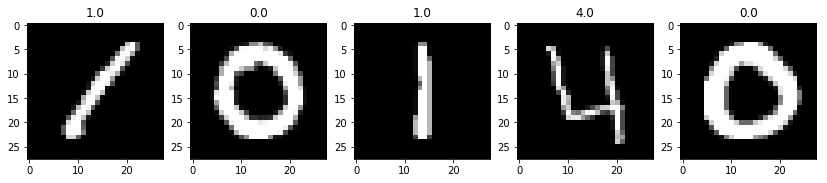

In [337]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img.reshape(28, 28), cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

Text(0, 0.5, 'explained_variance_ratio_')

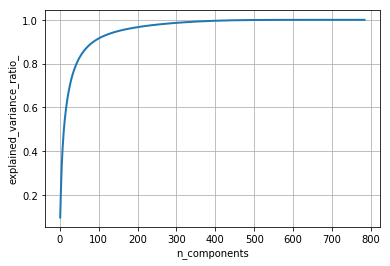

In [338]:
pca_test = PCA().fit(train_img)

cum_evr = np.cumsum(pca_test.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [339]:
test_size = 0.2
test_len = int(len(train_img)*(1-test_size))

x_train = train_img[:test_len]
y_train = train_label[:test_len]

x_test = train_img[test_len:]
y_test = train_label[test_len:]

In [340]:
pca = PCA(n_components=64).fit(x_train)

In [341]:
pca.explained_variance_ratio_.sum()

0.8624705790368422

In [375]:
trainData = pca.transform(x_train)

In [376]:
trainData.shape

(33600, 64)

## Нормируем

In [377]:
# По умолчанию используется L2 норма
trainDataNorm = trainData / np.linalg.norm(trainData, axis=1)[:, None]

## Разбиваем выборку на обучение и валидацию

In [378]:
trainDataNorm.shape

(33600, 64)

In [379]:
n_neighbors = 1
knn = KNeighborsClassifier( n_neighbors, weights = 'distance' )
knn.fit(trainDataNorm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='distance')

In [380]:
testData = pca.transform(x_test)
testDataNorm = testData / np.linalg.norm(testData, axis=1)[:, None]

In [385]:
y_test_pred = knn.predict(testDataNorm)

In [386]:
y_test[:10]

array([0., 7., 7., 2., 2., 6., 5., 7., 8., 5.])

In [387]:
y_test_pred[:10]

array([0., 7., 7., 2., 2., 6., 5., 7., 8., 5.])

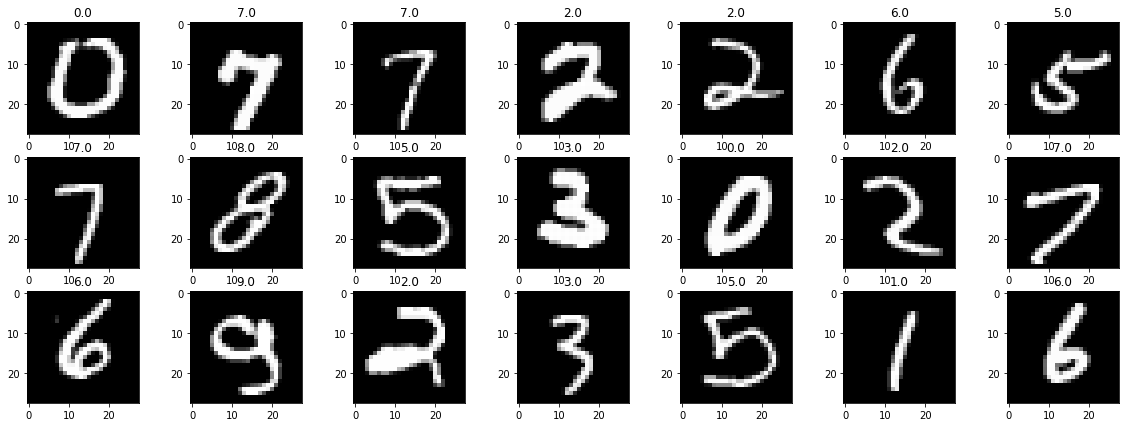

In [388]:
fig = plt.figure(figsize=(20, 7))
for i, img in enumerate(train_img[test_len:test_len+21], 1):
    subplot = fig.add_subplot(3, 7, i)
    plt.imshow(img.reshape(28, 28), cmap='gray');
    subplot.set_title('%s' % y_test_pred[i-1]);

## Оцениваем качество решение на валидационной выборке

In [389]:
print('Accuracy: %s' % accuracy_score(y_test, y_test_pred))

Accuracy: 0.9713095238095238


In [390]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       816
         1.0       0.81      0.95      0.88       909
         2.0       0.83      0.79      0.81       846
         3.0       0.76      0.78      0.77       937
         4.0       0.79      0.82      0.80       839
         5.0       0.73      0.68      0.70       702
         6.0       0.86      0.85      0.86       785
         7.0       0.90      0.84      0.87       893
         8.0       0.82      0.75      0.78       835
         9.0       0.76      0.75      0.75       838

   micro avg       0.82      0.82      0.82      8400
   macro avg       0.81      0.81      0.81      8400
weighted avg       0.82      0.82      0.81      8400



In [391]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[742   0   2   0   2  37  25   0   8   0]
 [  0 866  17   0   0  11   2   0  13   0]
 [ 13  33 665  25  34   3  28  14  29   2]
 [  8  16  31 731   2  57   6  13  49  24]
 [  2  12   8   0 692   5  19   5  10  86]
 [ 14  34   8  96  26 476  21   4  10  13]
 [ 20  20  33   1  16  23 671   0   1   0]
 [  2  41  15   2  16   9   0 753   5  50]
 [  8  31  10  89  12  23   8   4 624  26]
 [ 16  17  13  16  81  10   1  48   8 628]]


## Предсказания на тестовыйх данных

In [392]:
testData = pca.transform(test_img)
testDataNorm = testData / np.linalg.norm(testData, axis=1)[:, None]

In [393]:
testDataNorm.shape

(28000, 64)

In [397]:
pred_test = knn.predict(testDataNorm)

In [398]:
pred_test

array([2., 0., 9., ..., 3., 9., 2.])

## Визуализируем предсказания

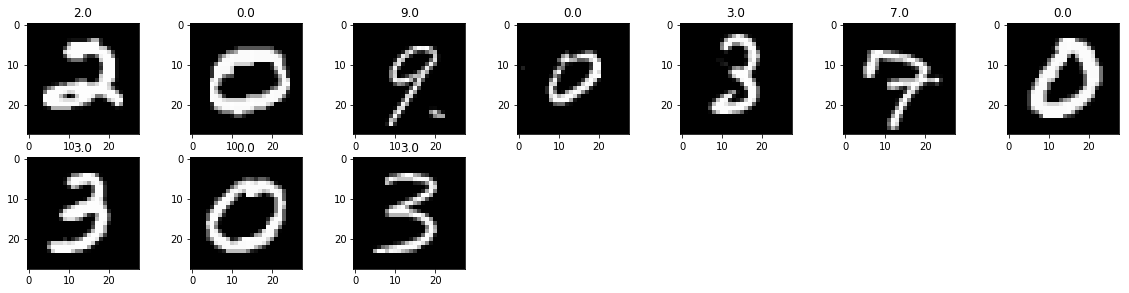

In [399]:
fig = plt.figure(figsize=(20, 7))
for i, img in enumerate(test_img[0:10], 1):
    subplot = fig.add_subplot(3, 7, i)
    plt.imshow(img.reshape(28, 28), cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [400]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [270]:
# Your submission scored 0.97228